In [76]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
import seaborn as sns
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, GridSearchCV

In [7]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [8]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

# Class distributions

### Normalized (%)

In [9]:
class_distribution_normalized = classifier_utils.get_projects_class_distribution(projects)

class_distribution_normalized

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,43.87,29.25,8.43,1.32,0.92,16.07,0.13
1,apache/directory-server,47.39,51.23,0.15,0.00,0.00,1.23,0.00
2,android/platform_frameworks_base,70.77,7.64,9.02,2.68,1.42,8.13,0.33
3,freenet/fred,40.42,16.50,23.32,6.23,0.49,12.94,0.10
4,alexo/wro4j,30.70,14.77,28.65,0.88,1.02,23.61,0.37
5,apache/lucene-solr,25.05,26.59,20.33,5.24,0.31,21.66,0.82
6,elastic/elasticsearch,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,getrailo/railo,31.99,37.76,8.74,7.17,0.35,13.81,0.17
8,atlasapi/atlas,24.04,44.50,12.40,5.37,0.90,12.53,0.26
9,hibernate/hibernate-orm,23.88,20.11,31.15,7.40,1.12,14.11,2.23


### Count

In [10]:
class_distribution_count = classifier_utils.get_projects_class_distribution(projects, False)

class_distribution_count

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,333,222,64,10,7,122,1
1,apache/directory-server,309,334,1,0,0,8,0
2,android/platform_frameworks_base,1741,188,222,66,35,200,8
3,freenet/fred,409,167,236,63,5,131,1
4,alexo/wro4j,420,202,392,12,14,323,5
5,apache/lucene-solr,244,259,198,51,3,211,8
6,elastic/elasticsearch,0,0,0,0,0,0,0
7,getrailo/railo,183,216,50,41,2,79,1
8,atlasapi/atlas,188,348,97,42,7,98,2
9,hibernate/hibernate-orm,171,144,223,53,8,101,16


# Decision Tree

### Base classifier

In [11]:
dt = DecisionTreeClassifier(min_samples_split=5, random_state=99)


In [12]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 99,
 'splitter': 'best'}

In [14]:
result_dt = classifier_utils.ProjectsResults(dt, projects, non_features_columns)

In [15]:
report_dt = result_dt.get_report_df()

report_dt


,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
26,CCI-MIT__XCoLab,5512,3757,0.973,0.971,0.972,0.971,0.573,0.931
1,apache__directory-server,845,652,0.922,0.923,0.923,0.923,0.512,0.843
24,jgralab__jgralab,2072,1802,0.823,0.819,0.820,0.819,0.491,0.643
19,Unidata__thredds,1154,950,0.902,0.901,0.901,0.901,0.777,0.557
18,apache__accumulo,4113,3148,0.838,0.835,0.836,0.835,0.635,0.548
10,CloudStack-extras__CloudStack-archive,1424,1106,0.699,0.700,0.699,0.700,0.437,0.467
0,Ramblurr__Anki-Android,892,759,0.678,0.681,0.679,0.681,0.439,0.432
5,apache__lucene-solr,1256,974,0.573,0.568,0.569,0.568,0.266,0.411
7,getrailo__railo,815,572,0.636,0.631,0.633,0.631,0.378,0.407
11,TeamDev-Ltd__OpenFaces,2979,2859,0.964,0.963,0.964,0.963,0.938,0.403


### Inspect project

In [16]:
sample_project_dt = result_dt.get_project('sebastianbenz__Jnario')

,precision,recall,f1-score,support
Combination,0.000000,0.000000,0.000000,1.000000
Manual,0.000000,0.000000,0.000000,5.000000
None,0.000000,0.000000,0.000000,1.000000
Version 1,0.999143,0.999510,0.999327,8166.000000
accuracy,0.998654,0.998654,0.998654,0.998654
macro avg,0.249786,0.249878,0.249832,8173.000000
weighted avg,0.998287,0.998654,0.998471,8173.000000


None

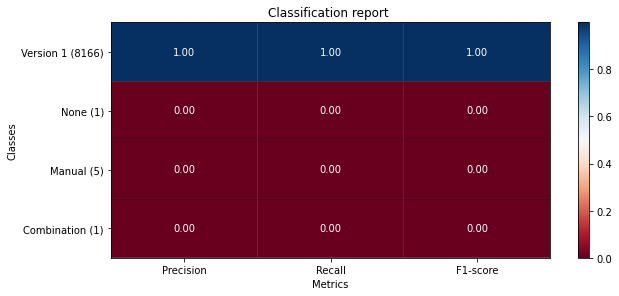

In [17]:
display(sample_project_dt.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project_dt.scores))

### Tuning hyperparameters (TODO)


In [102]:
parameters = {'criterion':('gini', 'entropy'),
              'min_samples_leaf':[1, 2, 3],
              'max_depth':[None, 3, 5, 10]}

result = classifier_utils.grid_search(projects[0], dt, parameters, non_features_columns)

pd.DataFrame(result)\
    .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
    .sort_values(by=['rank_test_score'])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


Best params and score:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
0.6917719298245614




,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
18,entropy,5,1,0.691772,0.047117,1
19,entropy,5,2,0.691772,0.048207,1
20,entropy,5,3,0.690456,0.047126,3
12,entropy,None,1,0.681070,0.047340,4
0,gini,None,1,0.681053,0.058606,5
7,gini,5,2,0.679895,0.049639,6
6,gini,5,1,0.679895,0.049639,6
8,gini,5,3,0.679895,0.055563,8
2,gini,None,3,0.679807,0.057261,9
14,entropy,None,3,0.679754,0.041163,10


# Random Forest

### Base classifier

In [ ]:
rf = RandomForestClassifier(random_state=99)
result_rf = classifier_utils.ProjectsResults(rf, projects, non_features_columns)

In [ ]:
report_rf = result_rf.get_report_df()

report_rf

### Inspect project

In [ ]:
sample_project_rf = result_rf.get_project('alexo__wro4j')

In [ ]:
display(sample_project_rf.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project_rf.scores))

### Tuning hyperparameters (TODO)

# Random Forest (XGBoost)

### Base classifier

In [ ]:
rf_xg = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')
result_rf_xg = classifier_utils.ProjectsResults(rf_xg, projects, non_features_columns, drop_na=False)

In [ ]:
report_rf_xg = result_rf_xg.get_report_df()

report_rf_xg

### Inspect project

In [ ]:
project = result_rf_xg.get_project('alexo__wro4j')

In [ ]:
display(project.get_scores_df())
display(display(classifier_utils.plot_classification_report(project.scores)))

### Tuning hyperparameters (TODO)

# Tuned algorithms' comparison (TODO)

In [ ]:
import importlib
importlib.reload(classifier_utils)
                 
# setup the algorithms with the desired parameters
algorithms = {}
algorithms['sklearn-decisionTree'] = DecisionTreeClassifier(min_samples_split=5, random_state=99)
# algorithms['sklearn-adaboost'] = AdaBoostClassifier(n_estimators=100, random_state=99)
algorithms['sklearn-randomForest'] = RandomForestClassifier(random_state=99)
# algorithms['xgBoost-randomForest'] = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')


results = []
for project in projects:
    for algorithm_name, algorithm in algorithms.items():
        row = []
        project_results = classifier_utils.evaluate_project(project, non_features_columns, algorithm)
        result = project_results.results
        precision = result.iloc[0]['precision']
        recall = result.iloc[0]['recall']
        f1_score = result.iloc[0]['f1-score']
        accuracy = result.iloc[0]['accuracy']
        majority_class = result.iloc[0]['baseline (majority)']
        improvement = result.iloc[0]['improvement']
        row = [project, algorithm_name, precision, recall, f1_score, accuracy, majority_class, improvement]
        results.append(row)
    
results = pd.DataFrame(results, columns=['project', 'algorithm', 'precision', 'recall', 'f1-score', 'accuracy', 'baseline (majority)', 'improvement'])
results.sort_values('improvement', ascending=False)
# print(results)
# pd.concat(results, ignore_index=True)

## Comparing algorithms' reports

First let's merge the reports from Decision Tree, Random Forest and Random Forest XGBoost in a big table.

In [ ]:
df_inner_dt_rf = pd.merge(report_dt, report_rf, on='project', how='inner', suffixes=('_dt', '_rf'))

df_xg = report_rf_xg.add_suffix("_xg").rename(columns={"project_xg": "project"})

df_inner_dt_rf_xg = pd.merge(df_inner_dt_rf,
                             df_xg,
                             on='project', how='inner')

df_inner_dt_rf_xg


### How much accuracy improvement does each algorithm provide to the projects?

In [ ]:
improvements = df_inner_dt_rf_xg.filter(regex=("project|improvement.*"))

# improvements

In [ ]:
cm = sns.light_palette("green", as_cmap=True)

improvements.style.background_gradient(cmap = cm).format({'improvement_dt' : "{:.2%}",
                           'improvement_rf' : "{:.2%}",
                           'improvement_xg': "{:.2%}"})

## For each project, which algorithm provides the highest accuracy improvement?

In [ ]:
winner_algo = improvements.set_index('project').idxmax(axis=1)

winner_algo

## In how many projects does each algorithm provide the highest accuracy improvement?

In [ ]:
winner_algo.groupby(winner_algo).size().sort_values(ascending=False)
